In [14]:
import sys
sys.path.append('../..')
import numpy as np
from pysrc.model import GaussianMixtureModel
from pysrc.pamm import PAMM
from pysrc.plots import cluster_distribution_2D, plot_contour_2D

# Global

Be careful! Very time-consuming

In [2]:
descriptors = np.loadtxt('GLOBAL/colvar.wt.30cv.4')

In [3]:
grid = np.loadtxt('GLOBAL/ref.idxs', dtype=int)[:10000] - 1

In [4]:
runner = PAMM(descriptors,
              dimension=30,
              period_text='6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28,6.28',
              ngrid=10000,
              fpoints=0.1,
              qs=1,
              outputfile='fp0.1-qs1',
              verbose=True)

In [5]:
runner.fit(grid)

Output()

# LOCAL

In [3]:
descriptors = np.loadtxt('GLOBAL/colvar.wt.30cv.4')

In [4]:
local_descriptors = \
    np.concatenate(
        [[[sample[i], sample[i + 16]] for i in range(14)
            ] for sample in descriptors])

In [6]:
local_descriptors.shape

(2100000, 2)

In [8]:
grid = np.loadtxt('GLOBAL/ref.idxs', dtype=int)[:5000] - 1

In [9]:
runner = PAMM(local_descriptors,
              dimension=2,
              period_text='6.28,6.28',
              ngrid=5000,
              fpoints=0.15,
              qs=1,
              outputfile='fp0.15-qs1',
              verbose=True)

In [10]:
runner.fit(grid)

Output()

Output()

Global eff. dim. 1.745348724718547


Output()

Output()

Nk-5 clusters were mergedinto other clusters.


In [15]:
abs, rel, bs = runner.bootstrap(64)  # also very time-consuming

Bootstrap 1 / 64
Starting Quick-Shift
  0 / 5000
  1000 / 5000
  2000 / 5000
5 cluster centers
Bootstrap 2 / 64
Starting Quick-Shift
  0 / 5000
  2000 / 5000
7 cluster centers
Bootstrap 3 / 64
Starting Quick-Shift
  0 / 5000
  2000 / 5000
9 cluster centers
Bootstrap 4 / 64
Starting Quick-Shift
  0 / 5000
  1000 / 5000
  2000 / 5000
5 cluster centers
Bootstrap 5 / 64
Starting Quick-Shift
  0 / 5000
  1000 / 5000
  2000 / 5000
7 cluster centers
Bootstrap 6 / 64
Starting Quick-Shift
  0 / 5000
6 cluster centers
Bootstrap 7 / 64


KeyboardInterrupt: 

(<Figure size 1200x1200 with 1 Axes>,
 <Axes: xlabel='$\\phi$', ylabel='$\\psi$'>)

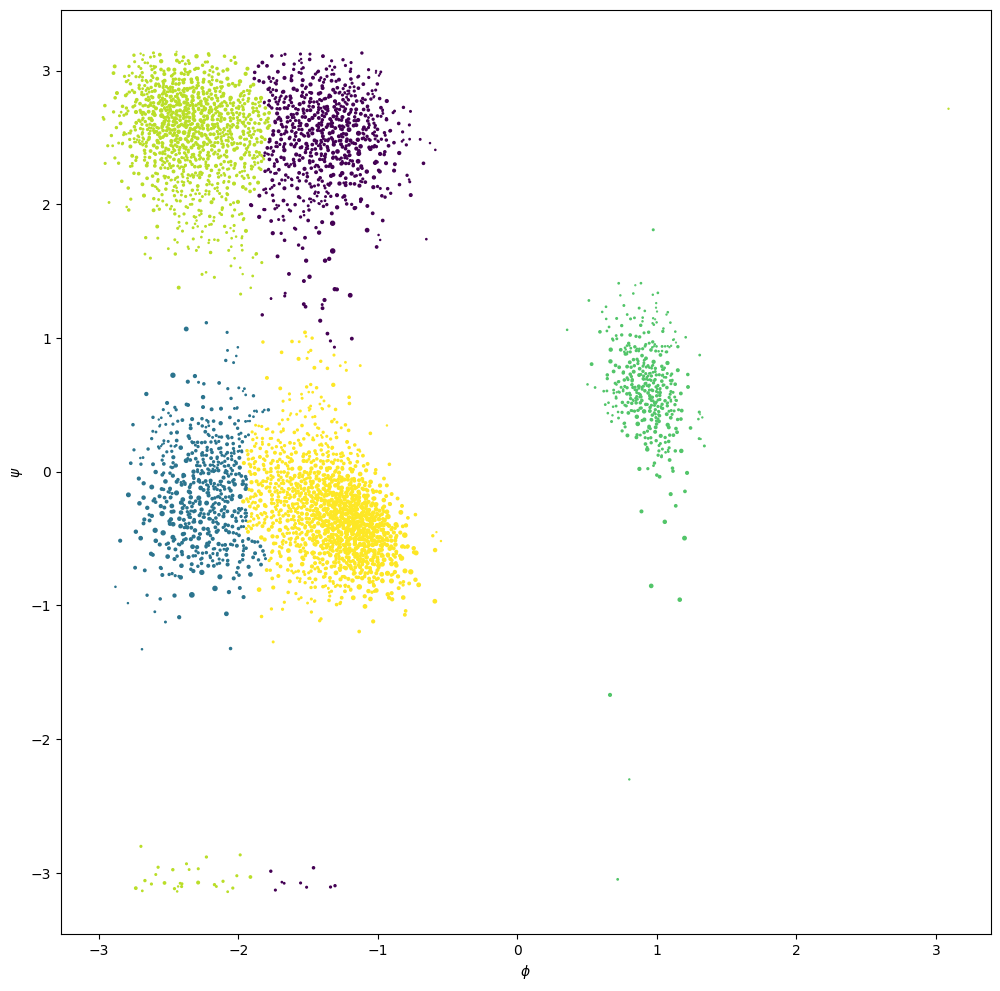

In [13]:
cluster_distribution_2D(runner, label_text=['$\phi$', '$\psi$'])

In [15]:
gaussian_weights, gaussian_means, gaussian_cov = runner.generate_probability_model()

In [88]:
p = GaussianMixtureModel(gaussian_weights, gaussian_means, gaussian_cov, runner.period)

(<Figure size 640x480 with 2 Axes>, <Axes: >)

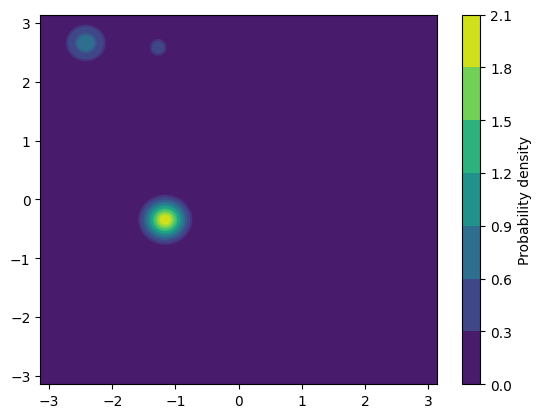

In [91]:
plot_contour_2D(p, (-np.pi, np.pi), (-np.pi, np.pi))

(<Figure size 640x480 with 2 Axes>, <Axes: >)

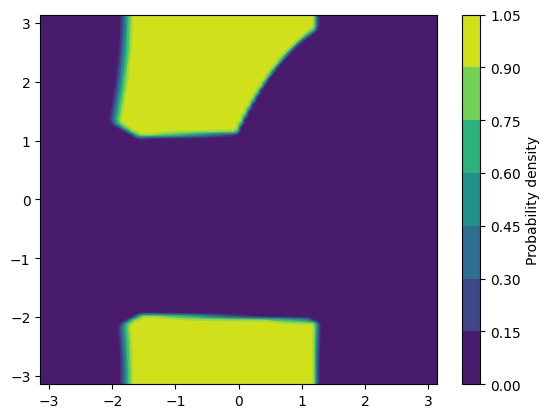

In [90]:
plot_contour_2D(p, (-np.pi, np.pi), (-np.pi, np.pi), gaussians=[0])